### Data Visualizaiton
We will explore the dataset to answer the following research questions:
1. What is the trajectory of recovery for patients by medication
2. What is the pattern for recovery in each medication group

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1920, 434)

### Build a Dataframe with Time Series for Plotting

In [2]:
# create df for all patients tested for opioids who completed treatment
opiates_all = helper.build_test_series(data, 'test','Opiate300', None)
# update column name
opiates_all.columns = ['all']

# create methadone and buprenorphine test series
methadone_patients = helper.build_test_series(data, 'test','Opiate300', 'methadone')
buprenorphine_patients = helper.build_test_series(data, 'test','Opiate300', 'buprenorphine')

# combine the three series into one df
tests = pd.concat([opiates_all, methadone_patients, buprenorphine_patients], axis=1)

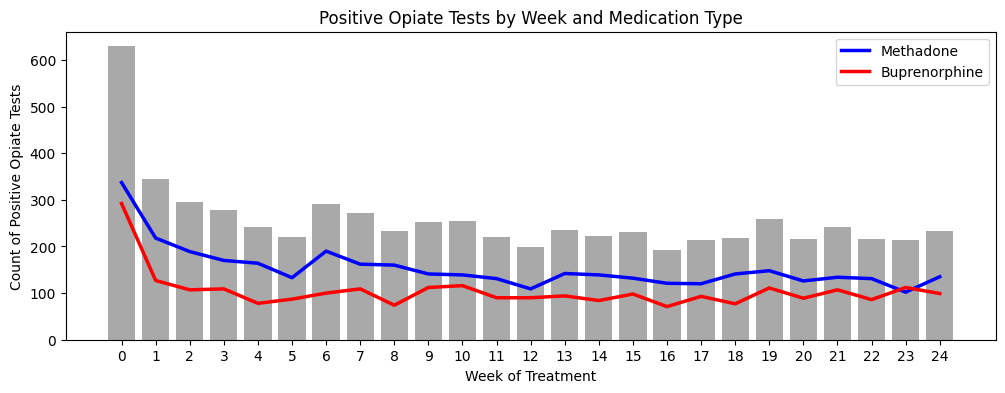

In [5]:
# set figure size
fig = plt.figure(figsize=(12, 4))

# use barplot to plot all tests
sns.barplot(x=np.array(tests.index), y='all', data=tests, color='darkgray')

# use lineplot to plot methadone tests
plt.plot(np.array(tests.index), np.array(tests['met']), color='blue', label='Methadone', linewidth=2.5);

# use lineplot to plot buprenorphine tests
plt.plot(np.array(tests.index), np.array(tests['bup']), color='red', label='Buprenorphine', linewidth=2.5);

# Add labels and title
plt.title('Positive Opiate Tests by Week and Medication Type')
plt.ylabel('Count of Positive Opiate Tests')
plt.xlabel('Week of Treatment')
plt.legend();

In [22]:
# create df for methadone users who responded to treatment
methadone_r = data.loc[
                    (data.dropout == 0) &
                    (data.medication == 1)&
                    (data.responder == 1)
                    ]


# create df for methadone users who did not respond to treatment
methadone_nr = data.loc[
                    (data.dropout == 0) &
                    (data.medication == 1)&
                    (data.responder == 0)
                    ]

# create df for buprenorphine users who responded to treatment
buprenorphine_r = data.loc[
                    (data.dropout == 0) &
                    (data.medication == 2)&
                    (data.responder == 1)
                    ]

# create df for buprenorphine users who did not respond to treatment
buprenorphine_nr = data.loc[
                    (data.dropout == 0) &
                    (data.medication == 2)&
                    (data.responder == 0)
                    ]




In [6]:
# create series for patients who responded to treatment
methadone_r = methadone_r[[col for col in methadone_r.columns if 'test_Opiate' in col]]

# remove 'test_Opiate300_18 from column names
methadone_r.columns = [col.replace('test_Opiate300_', '') for col in methadone_r.columns]




,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
36,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
methadone_r = methadone_r.sum().to_frame('met_r')

In [13]:
# create series for patients who did not respond to treatment
methadone_nr = methadone_nr[[col for col in methadone_nr.columns if 'test_Opiate' in col]]

# remove 'test_Opiate300_18 from column names
methadone_nr.columns = [col.replace('test_Opiate300_', '') for col in methadone_nr.columns]

In [16]:
methadone_nr = methadone_nr.sum().to_frame('met_nr')

In [18]:
# combine the two series into one df
methadone = pd.concat([methadone_r, methadone_nr], axis=1)

methadone['all'] = methadone['met_r'] + methadone['met_nr']

methadone

,met_r,met_nr,all
0,110.0,227.0,337.0
1,56.0,162.0,218.0
2,46.0,143.0,189.0
3,45.0,125.0,170.0
4,36.0,128.0,164.0
5,41.0,92.0,133.0
6,33.0,157.0,190.0
7,28.0,134.0,162.0
8,24.0,136.0,160.0
9,17.0,124.0,141.0


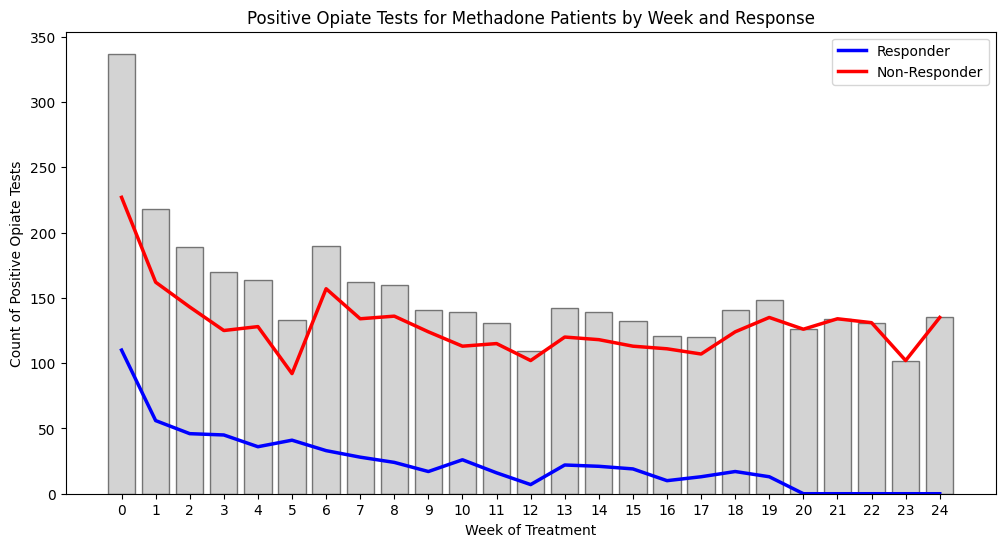

In [21]:
# set figure size
fig = plt.figure(figsize=(12, 6))

# use barplot to plot all tests
sns.barplot(x=np.array(methadone.index), y='all', data=methadone, color='darkgray', alpha=0.5, edgecolor='black')

# use lineplot to plot methadone tests for patients who responded to treatment
plt.plot(np.array(methadone.index), np.array(methadone['met_r']), color='blue', label='Responder', linewidth=2.5);

# use lineplot to plot methadone tests for patients who did not respond to treatment
plt.plot(np.array(methadone.index), np.array(methadone['met_nr']), color='red', label='Non-Responder', linewidth=2.5);

# Add labels and title
plt.title('Positive Opiate Tests for Methadone Patients by Week and Response')
plt.ylabel('Count of Positive Opiate Tests')
plt.xlabel('Week of Treatment')
plt.legend(['responder', 'non-responder'])
plt.legend();


In [23]:
# create series for patients who took buprenorphine and responded to treatment
buprenorphine_r = buprenorphine_r[[col for col in buprenorphine_r.columns if 'test_Opiate' in col]]

# remove 'test_Opiate300_18 from column names
buprenorphine_r.columns = [col.replace('test_Opiate300_', '') for col in buprenorphine_r.columns]

buprenorphine_r = buprenorphine_r.sum().to_frame('bup_r')

# create series for patients who took buprenorphine and did not respond to treatment
buprenorphine_nr = buprenorphine_nr[[col for col in buprenorphine_nr.columns if 'test_Opiate' in col]]

# remove 'test_Opiate300_18 from column names
buprenorphine_nr.columns = [col.replace('test_Opiate300_', '') for col in buprenorphine_nr.columns]

buprenorphine_nr = buprenorphine_nr.sum().to_frame('bup_nr')

# combine the two series into one df
buprenorphine = pd.concat([buprenorphine_r, buprenorphine_nr], axis=1)

In [24]:
buprenorphine['all'] = buprenorphine['bup_r'] + buprenorphine['bup_nr']

buprenorphine

,bup_r,bup_nr,all
0,103.0,189.0,292.0
1,29.0,98.0,127.0
2,19.0,88.0,107.0
3,21.0,88.0,109.0
4,17.0,61.0,78.0
5,-1.0,88.0,87.0
6,8.0,92.0,100.0
7,16.0,93.0,109.0
8,3.0,71.0,74.0
9,20.0,92.0,112.0


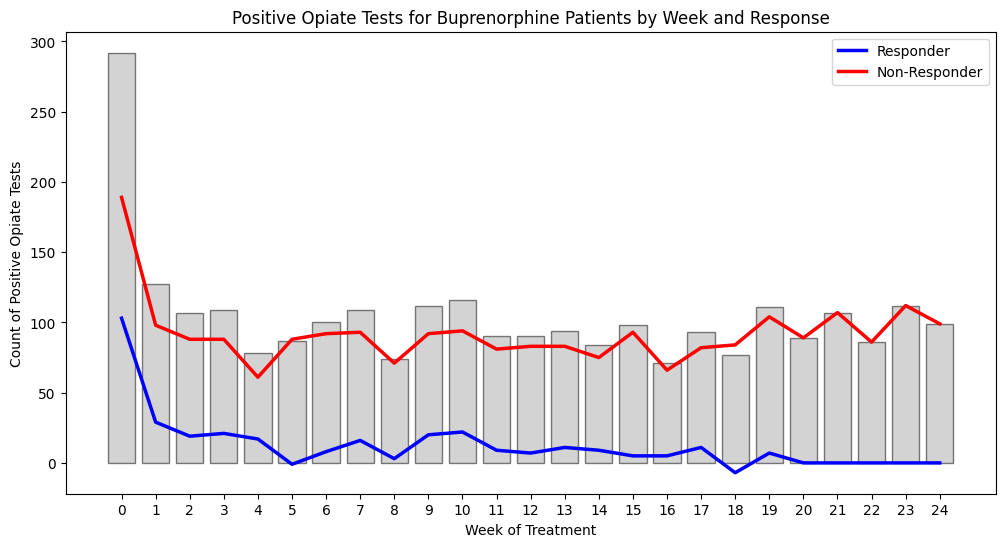

In [25]:
# set figure size
fig = plt.figure(figsize=(12, 6))

# use barplot to plot all tests
sns.barplot(x=np.array(buprenorphine.index), y='all', data=buprenorphine, color='darkgray', alpha=0.5, edgecolor='black')

# use lineplot to plot buprenorphine tests for patients who responded to treatment
plt.plot(np.array(buprenorphine.index), np.array(buprenorphine['bup_r']), color='blue', label='Responder', linewidth=2.5);

# use lineplot to plot buprenorphine tests for patients who did not respond to treatment
plt.plot(np.array(buprenorphine.index), np.array(buprenorphine['bup_nr']), color='red', label='Non-Responder', linewidth=2.5);

# Add labels and title
plt.title('Positive Opiate Tests for Buprenorphine Patients by Week and Response')
plt.ylabel('Count of Positive Opiate Tests')
plt.xlabel('Week of Treatment')
plt.legend();

In [29]:
# create df with bup responders and met responders
responder = pd.concat([methadone[['met_r']],buprenorphine[['bup_r']]], axis=1)

responder['all'] = responder['met_r'] + responder['bup_r']

responder

,met_r,bup_r,all
0,110.0,103.0,213.0
1,56.0,29.0,85.0
2,46.0,19.0,65.0
3,45.0,21.0,66.0
4,36.0,17.0,53.0
5,41.0,-1.0,40.0
6,33.0,8.0,41.0
7,28.0,16.0,44.0
8,24.0,3.0,27.0
9,17.0,20.0,37.0


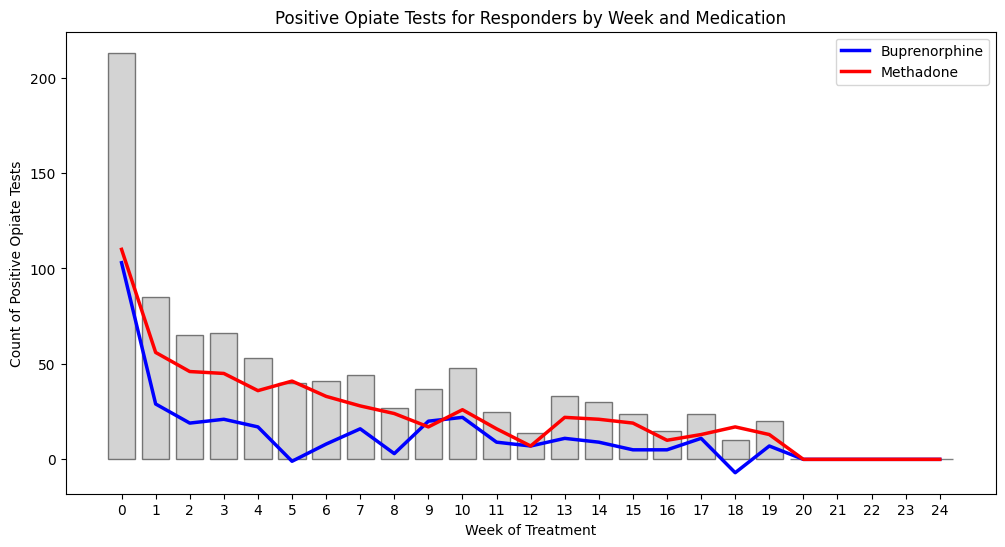

In [30]:
# set figure size
fig = plt.figure(figsize=(12, 6))

# use barplot to plot all tests
sns.barplot(x=np.array(responder.index), y='all', data=responder, color='darkgray', alpha=0.5, edgecolor='black')

# use lineplot to plot buprenorphine tests for patients who responded to treatment
plt.plot(np.array(responder.index), np.array(responder['bup_r']), color='blue', label='Buprenorphine', linewidth=2.5);

# use lineplot to plot methadone tests for patients who responded to treatment
plt.plot(np.array(responder.index), np.array(responder['met_r']), color='red', label='Methadone', linewidth=2.5);

# Add labels and title
plt.title('Positive Opiate Tests for Responders by Week and Medication')
plt.ylabel('Count of Positive Opiate Tests')
plt.xlabel('Week of Treatment')
plt.legend();


In [31]:
# create df with bup non-responders and met non-responders
non_responder = pd.concat([methadone[['met_nr']],buprenorphine[['bup_nr']]], axis=1)

non_responder['all'] = non_responder['met_nr'] + non_responder['bup_nr']

non_responder

,met_nr,bup_nr,all
0,227.0,189.0,416.0
1,162.0,98.0,260.0
2,143.0,88.0,231.0
3,125.0,88.0,213.0
4,128.0,61.0,189.0
5,92.0,88.0,180.0
6,157.0,92.0,249.0
7,134.0,93.0,227.0
8,136.0,71.0,207.0
9,124.0,92.0,216.0


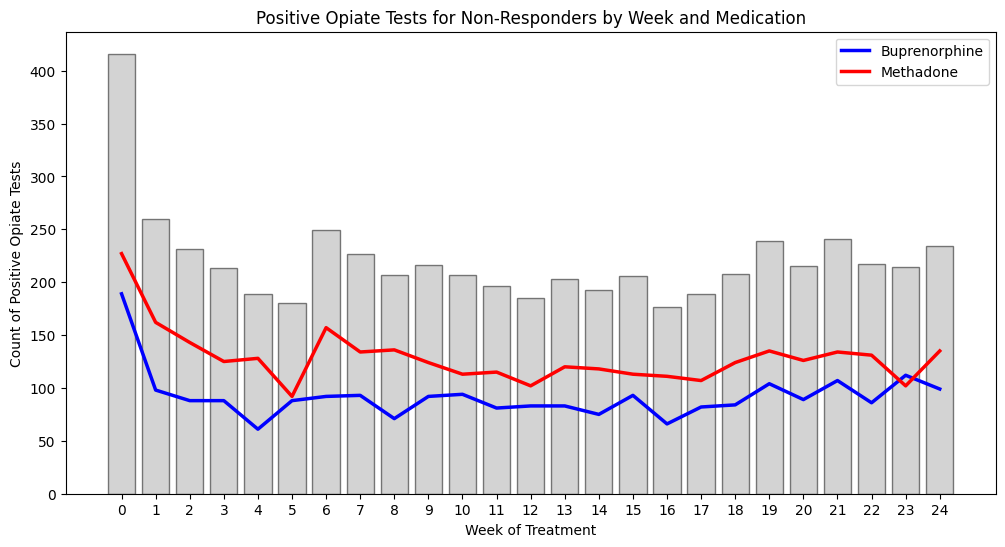

In [32]:
# set figure size
fig = plt.figure(figsize=(12, 6))

# use barplot to plot all tests
sns.barplot(x=np.array(non_responder.index), y='all', data=non_responder, color='darkgray', alpha=0.5, edgecolor='black')

# use lineplot to plot buprenorphine tests for patients who did not respond to treatment
plt.plot(np.array(non_responder.index), np.array(non_responder['bup_nr']), color='blue', label='Buprenorphine', linewidth=2.5);

# use lineplot to plot methadone tests for patients who did not respond to treatment
plt.plot(np.array(non_responder.index), np.array(non_responder['met_nr']), color='red', label='Methadone', linewidth=2.5);

# Add labels and title
plt.title('Positive Opiate Tests for Non-Responders by Week and Medication')
plt.ylabel('Count of Positive Opiate Tests')
plt.xlabel('Week of Treatment')
plt.legend()
plt.show();

# create df with bup non-responders and met responders